In [1]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

# Clear any logs from previous runs
%rm -rf ./my_logs/

import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Data Import and Pre-processing

In [2]:
import pandas as pd
import numpy as np

In [3]:
creepy = pd.read_pickle('./pickles/new/creepy_with_log.pickle')
noncreepy = pd.read_pickle('./pickles/new/non-creepy_with_log.pickle')

In [4]:
creepy_sum_vec_with_log_prepended = creepy.loc[:,'sum_vec_with_log_prepended'].copy()
noncreepy_sum_vec_with_log_prepended = noncreepy.loc[:,'sum_vec_with_log_prepended'].copy()

In [5]:
creepy_features = pd.DataFrame(creepy_sum_vec_with_log_prepended.to_list()).to_numpy(dtype = float)
creepy_labels = np.ones(len(creepy_features))

In [6]:
noncreepy_features = pd.DataFrame(noncreepy_sum_vec_with_log_prepended.to_list()).to_numpy(dtype = float)
noncreepy_labels = np.zeros(len(noncreepy_features))

In [7]:
features = np.concatenate((creepy_features, noncreepy_features))
labels = np.concatenate((creepy_labels, noncreepy_labels))
print(features, labels)

[[  0.69813472   2.94098592  -5.6173358  ...  -4.59305143   0.358845
   -9.06916523]
 [  0.69813472   2.94098592  -5.6173358  ...  -4.59305143   0.358845
   -9.06916523]
 [  0.69813472 -19.20127296 -13.71549892 ...  18.18037987 -16.4872303
   -6.75176859]
 ...
 [  0.69813472  -0.78924334   0.29064384 ...   1.36802995  -3.79267383
   -1.91743255]
 [  0.69813472   2.08661604  -1.43281949 ...  -1.90943027   3.40888762
    0.54635704]
 [  0.69813472  -1.46298337  -2.17777109 ...   1.96948338  -0.8519302
   -2.56011105]] [1. 1. 1. ... 0. 0. 0.]


In [8]:
print(features.shape, labels.shape)

(37846, 769) (37846,)


In [9]:
from sklearn.utils import shuffle

features, labels = shuffle(features, labels)
print(features, labels)

[[  0.69813472 -15.96822071 -14.56222439 ...  18.76568985   7.02918625
  -11.56485271]
 [  0.69813472 -36.367836   -24.92290688 ...  17.48143768  -0.3846122
  -31.0698185 ]
 [  0.69813472  -4.46763515  -2.64106679 ...   8.75859642  -2.07119775
   -1.80760491]
 ...
 [  0.69813472  -8.76243973   0.12324375 ...   2.24136686  -9.48912525
   -4.27170372]
 [  0.69813472  -1.65649807   1.48604822 ...  -2.80092072  -0.50473785
   -1.7349844 ]
 [  0.69813472  -2.48045969 -26.07553482 ...  13.62527752 -10.29114056
  -43.56845093]] [1. 1. 1. ... 0. 0. 1.]


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
print(scaled_features, labels)

[[0.         0.9214576  0.59128962 ... 0.8565027  0.47807472 0.41693146]
 [0.         0.91495218 0.58472499 ... 0.85558145 0.47170669 0.41008282]
 [0.         0.92512513 0.59884297 ... 0.84932418 0.47025801 0.42035745]
 ...
 [0.         0.92375552 0.60059447 ... 0.84464909 0.46388643 0.41949225]
 [0.         0.9260216  0.60145795 ... 0.84103204 0.47160351 0.42038295]
 [0.         0.92575883 0.58399468 ... 0.85281526 0.46319755 0.40569427]] [1. 1. 1. ... 0. 0. 1.]


- [x] 70% train, 15% val, 15% test
 - Train: 26500
 - Valid: 5677
 - Test: 5669
- [ ] 80% train, 10% val, 10% test
- [ ] 60% train, 20% val, 20% test

In [11]:
scaled_features[:,0]

array([0., 0., 0., ..., 0., 0., 0.])

In [12]:
X_train, X_valid, X_test = scaled_features[:26500], scaled_features[26500:26500+5677], scaled_features[26500+5677:]
y_train, y_valid, y_test = labels[:26500], labels[26500:26500+5677], labels[26500+5677:]

In [13]:
import tensorflow as tf
from tensorflow import keras

# Model here

In [14]:
model = keras.Sequential([
#     keras.layers.Dense(units = 303, input_shape = (769,), activation = 'relu'),
#     keras.layers.Dropout(0.5),
    keras.layers.Dense(units = 303, input_shape = (769,), activation = 'relu'),
    keras.layers.Dropout(0.1),
#     keras.layers.Dense(units = 256, activation = 'relu'),
    keras.layers.Dense(units = 128, activation = 'relu'),
    keras.layers.Dense(units = 64, activation = 'relu'),
    keras.layers.Dense(units = 32, activation = 'relu'),
    keras.layers.Dense(units = 16, activation = 'relu'),
    keras.layers.Dense(units = 1, activation = 'sigmoid') # here the units must be 1 in order for binary classifications to work
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 303)               233310    
_________________________________________________________________
dropout (Dropout)            (None, 303)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               38912     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 1

In [16]:
model.compile(loss = 'binary_crossentropy',
             optimizer = keras.optimizers.Adam(lr=0.000959, beta_1 = 0.9, beta_2=0.999), # you can tune the learning rate here. Default lr = 0.01
             metrics=['accuracy'])

In [18]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_log_dir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_log_dir()

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs = 30, 
                   validation_data=(X_valid, y_valid),
                   callbacks=[tensorboard_cb])

%tensorboard --logdir my_logs

Epoch 1/30
829/829 [==============================] - 2s 2ms/step - loss: 0.2907 - accuracy: 0.9006 - val_loss: 0.2153 - val_accuracy: 0.9354
Epoch 2/30
829/829 [==============================] - 2s 2ms/step - loss: 0.2949 - accuracy: 0.8995 - val_loss: 0.2176 - val_accuracy: 0.9392
Epoch 3/30
829/829 [==============================] - 2s 2ms/step - loss: 0.2916 - accuracy: 0.9006 - val_loss: 0.2003 - val_accuracy: 0.9433
Epoch 4/30
829/829 [==============================] - 2s 2ms/step - loss: 0.3057 - accuracy: 0.8935 - val_loss: 0.2013 - val_accuracy: 0.9413
Epoch 5/30
829/829 [==============================] - 2s 2ms/step - loss: 0.3042 - accuracy: 0.8941 - val_loss: 0.2470 - val_accuracy: 0.9162
Epoch 6/30
829/829 [==============================] - 2s 2ms/step - loss: 0.2921 - accuracy: 0.9018 - val_loss: 0.2130 - val_accuracy: 0.9276
Epoch 7/30
829/829 [==============================] - 2s 2ms/step - loss: 0.2993 - accuracy: 0.8966 - val_loss: 0.2196 - val_accuracy: 0.9278
Epoch 

ERROR: Could not find `tensorboard`. Please ensure that your PATH
contains an executable `tensorboard` program, or explicitly specify
the path to a TensorBoard binary by setting the `TENSORBOARD_BINARY`
environment variable.

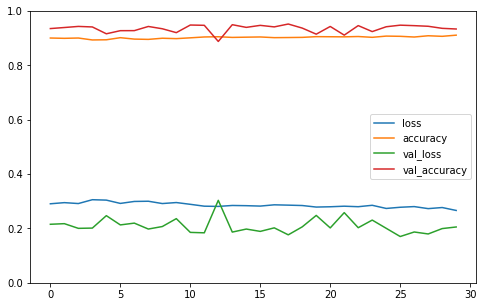

In [51]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid = True
plt.gca().set_ylim(0,1)
plt.show()


In [20]:
model.evaluate(X_test, y_test)

178/178 [==============================] - 0s 1ms/step - loss: 0.2005 - accuracy: 0.9347


[0.20049841701984406, 0.9347327351570129]

# Keras Tuner

In [42]:
import kerastuner as kt
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
import time

In [43]:
kt.__version__

'1.0.1'

In [44]:
LOG_DIR = f"./keras_tuner_logs/{int(time.time())}"

In [45]:
def build_model(hp):
    model = keras.Sequential()

    # Tune the number of units in the first Dense layer
    # Choose an optimal value between 256-512 tep 32
    hp_input_units = hp.Int('input_units', min_value = 256, max_value = 512, step = 32)
    model.add(Dense(units = hp_input_units, input_shape = (769,), activation = 'relu'))
    
    for i in range(hp.Int("n_layers", min_value = 1, max_value = 6)):
        # Tune the number of units in the each Dense layer
        # Choose an optimal value between 8-512 step 8
        hp_dense_i_units = hp.Int(f"dense_{i}_units", min_value = 8, max_value = 512, step = 8)
        model.add(Dense(units = hp_dense_i_units, activation = 'relu'))
        
        # Tune the number of dropout rate between Dense layers
        # Choose an optimal value between 0-0.5 step 0.1
        hp_dense_i_dropout_rate = hp.Float(f"dense_{i}_dropout_rate", min_value = 0, max_value = 0.5, step = 0.1)
        model.add(Dropout(hp_dense_i_dropout_rate))
    
    model.add(Dense(units = 1, activation = 'sigmoid'))# here the units must be 1 in order for binary classifications to work
    
    # Tune the number of dropout rate between Dense layers
    # Choose an optimal value between 0.0008-0.001 step 0.00002
    # 10 numbers
    hp_lr_rate = hp.Float(f"optimizer_lr_rate", min_value = 0.0008, max_value = 0.001, step = 0.00002)
    model.compile(loss = 'binary_crossentropy',
             optimizer = keras.optimizers.Adam(lr=hp_lr_rate, beta_1 = 0.9, beta_2=0.999), # you can tune the learning rate here. Default lr = 0.01
             metrics=['accuracy'])
    
    return model

In [46]:
tuner = kt.RandomSearch(
    build_model,
    objective = "val_accuracy",
    max_trials = 5,
    executions_per_trial = 3,
    directory = LOG_DIR
)

In [47]:
tuner.search(x = X_train,
             y = y_train,
             epochs = 30,
#              batch_size = 64,
             validation_data = (X_valid, y_valid))

Epoch 1/30
829/829 [==============================] - ETA: 0s - loss: 0.7477 - accuracy: 0.34 - ETA: 1s - loss: 0.6928 - accuracy: 0.54 - ETA: 1s - loss: 0.6923 - accuracy: 0.57 - ETA: 1s - loss: 0.6909 - accuracy: 0.57 - ETA: 1s - loss: 0.6884 - accuracy: 0.57 - ETA: 1s - loss: 0.6886 - accuracy: 0.57 - ETA: 1s - loss: 0.6870 - accuracy: 0.57 - ETA: 1s - loss: 0.6868 - accuracy: 0.57 - ETA: 1s - loss: 0.6857 - accuracy: 0.57 - ETA: 1s - loss: 0.6846 - accuracy: 0.57 - ETA: 1s - loss: 0.6837 - accuracy: 0.57 - ETA: 1s - loss: 0.6827 - accuracy: 0.58 - ETA: 1s - loss: 0.6820 - accuracy: 0.58 - ETA: 0s - loss: 0.6808 - accuracy: 0.58 - ETA: 0s - loss: 0.6804 - accuracy: 0.58 - ETA: 0s - loss: 0.6791 - accuracy: 0.58 - ETA: 0s - loss: 0.6785 - accuracy: 0.58 - ETA: 0s - loss: 0.6774 - accuracy: 0.58 - ETA: 0s - loss: 0.6759 - accuracy: 0.58 - ETA: 0s - loss: 0.6739 - accuracy: 0.58 - ETA: 0s - loss: 0.6731 - accuracy: 0.58 - ETA: 0s - loss: 0.6701 - accuracy: 0.58 - ETA: 0s - loss: 0.6683

Epoch 1/30
829/829 [==============================] - ETA: 0s - loss: 0.7702 - accuracy: 0.50 - ETA: 1s - loss: 0.6864 - accuracy: 0.58 - ETA: 1s - loss: 0.6885 - accuracy: 0.56 - ETA: 1s - loss: 0.6840 - accuracy: 0.57 - ETA: 1s - loss: 0.6867 - accuracy: 0.57 - ETA: 1s - loss: 0.6853 - accuracy: 0.57 - ETA: 1s - loss: 0.6839 - accuracy: 0.58 - ETA: 1s - loss: 0.6825 - accuracy: 0.58 - ETA: 1s - loss: 0.6825 - accuracy: 0.58 - ETA: 1s - loss: 0.6826 - accuracy: 0.58 - ETA: 1s - loss: 0.6823 - accuracy: 0.58 - ETA: 1s - loss: 0.6823 - accuracy: 0.57 - ETA: 1s - loss: 0.6813 - accuracy: 0.57 - ETA: 1s - loss: 0.6797 - accuracy: 0.57 - ETA: 1s - loss: 0.6762 - accuracy: 0.58 - ETA: 1s - loss: 0.6713 - accuracy: 0.58 - ETA: 0s - loss: 0.6664 - accuracy: 0.59 - ETA: 0s - loss: 0.6617 - accuracy: 0.60 - ETA: 0s - loss: 0.6506 - accuracy: 0.61 - ETA: 0s - loss: 0.6390 - accuracy: 0.62 - ETA: 0s - loss: 0.6231 - accuracy: 0.63 - ETA: 0s - loss: 0.6172 - accuracy: 0.64 - ETA: 0s - loss: 0.6089

Epoch 1/30
829/829 [==============================] - ETA: 0s - loss: 0.7292 - accuracy: 0.34 - ETA: 1s - loss: 0.7079 - accuracy: 0.52 - ETA: 1s - loss: 0.7005 - accuracy: 0.52 - ETA: 1s - loss: 0.6933 - accuracy: 0.54 - ETA: 1s - loss: 0.6935 - accuracy: 0.54 - ETA: 1s - loss: 0.6930 - accuracy: 0.54 - ETA: 1s - loss: 0.6913 - accuracy: 0.55 - ETA: 1s - loss: 0.6908 - accuracy: 0.55 - ETA: 1s - loss: 0.6885 - accuracy: 0.55 - ETA: 1s - loss: 0.6864 - accuracy: 0.56 - ETA: 1s - loss: 0.6855 - accuracy: 0.56 - ETA: 1s - loss: 0.6822 - accuracy: 0.56 - ETA: 1s - loss: 0.6744 - accuracy: 0.57 - ETA: 0s - loss: 0.6633 - accuracy: 0.59 - ETA: 0s - loss: 0.6474 - accuracy: 0.60 - ETA: 0s - loss: 0.6312 - accuracy: 0.62 - ETA: 0s - loss: 0.6136 - accuracy: 0.63 - ETA: 0s - loss: 0.6007 - accuracy: 0.65 - ETA: 0s - loss: 0.5878 - accuracy: 0.66 - ETA: 0s - loss: 0.5711 - accuracy: 0.67 - ETA: 0s - loss: 0.5572 - accuracy: 0.68 - ETA: 0s - loss: 0.5433 - accuracy: 0.69 - ETA: 0s - loss: 0.5328

Epoch 1/30
829/829 [==============================] - ETA: 0s - loss: 0.6953 - accuracy: 0.50 - ETA: 1s - loss: 0.6786 - accuracy: 0.61 - ETA: 1s - loss: 0.6834 - accuracy: 0.59 - ETA: 1s - loss: 0.6798 - accuracy: 0.59 - ETA: 1s - loss: 0.6789 - accuracy: 0.60 - ETA: 1s - loss: 0.6786 - accuracy: 0.59 - ETA: 1s - loss: 0.6769 - accuracy: 0.60 - ETA: 1s - loss: 0.6774 - accuracy: 0.59 - ETA: 1s - loss: 0.6771 - accuracy: 0.59 - ETA: 1s - loss: 0.6759 - accuracy: 0.59 - ETA: 1s - loss: 0.6752 - accuracy: 0.59 - ETA: 1s - loss: 0.6724 - accuracy: 0.59 - ETA: 1s - loss: 0.6686 - accuracy: 0.60 - ETA: 1s - loss: 0.6678 - accuracy: 0.60 - ETA: 1s - loss: 0.6669 - accuracy: 0.60 - ETA: 1s - loss: 0.6633 - accuracy: 0.60 - ETA: 1s - loss: 0.6634 - accuracy: 0.60 - ETA: 1s - loss: 0.6611 - accuracy: 0.60 - ETA: 0s - loss: 0.6527 - accuracy: 0.61 - ETA: 0s - loss: 0.6515 - accuracy: 0.62 - ETA: 0s - loss: 0.6505 - accuracy: 0.62 - ETA: 0s - loss: 0.6449 - accuracy: 0.63 - ETA: 0s - loss: 0.6427

Epoch 1/30
829/829 [==============================] - ETA: 0s - loss: 0.7109 - accuracy: 0.43 - ETA: 1s - loss: 0.7078 - accuracy: 0.54 - ETA: 1s - loss: 0.6950 - accuracy: 0.57 - ETA: 1s - loss: 0.6916 - accuracy: 0.57 - ETA: 1s - loss: 0.6893 - accuracy: 0.57 - ETA: 1s - loss: 0.6864 - accuracy: 0.58 - ETA: 1s - loss: 0.6851 - accuracy: 0.58 - ETA: 1s - loss: 0.6841 - accuracy: 0.58 - ETA: 1s - loss: 0.6828 - accuracy: 0.58 - ETA: 1s - loss: 0.6816 - accuracy: 0.58 - ETA: 1s - loss: 0.6808 - accuracy: 0.58 - ETA: 1s - loss: 0.6813 - accuracy: 0.58 - ETA: 1s - loss: 0.6816 - accuracy: 0.58 - ETA: 1s - loss: 0.6818 - accuracy: 0.58 - ETA: 1s - loss: 0.6816 - accuracy: 0.58 - ETA: 1s - loss: 0.6815 - accuracy: 0.58 - ETA: 1s - loss: 0.6811 - accuracy: 0.58 - ETA: 1s - loss: 0.6812 - accuracy: 0.58 - ETA: 1s - loss: 0.6809 - accuracy: 0.58 - ETA: 1s - loss: 0.6805 - accuracy: 0.58 - ETA: 1s - loss: 0.6799 - accuracy: 0.58 - ETA: 0s - loss: 0.6779 - accuracy: 0.58 - ETA: 0s - loss: 0.6765

INFO:tensorflow:Oracle triggered exit


In [48]:
tuner.get_best_hyperparameters(num_trials=1)

In [49]:
# tuner.results_summery()

In [50]:
tuner.get_best_models()[0].summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 480)               369600    
_________________________________________________________________
dense_1 (Dense)              (None, 96)                46176     
_________________________________________________________________
dropout (Dropout)            (None, 96)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 472)               45784     
_________________________________________________________________
dropout_1 (Dropout)          (None, 472)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 472)               223256    
_________________________________________________________________
dropout_2 (Dropout)          (None, 472)               0

In [52]:
model = tuner.get_best_models()[0]

In [53]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_log_dir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_log_dir()

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs = 30, 
                   validation_data=(X_valid, y_valid),
                   callbacks=[tensorboard_cb])

%tensorboard --logdir my_logs

Epoch 1/30
829/829 [==============================] - ETA: 26s - loss: 0.1968 - accuracy: 0.9062 - ETA: 14s - loss: 0.1878 - accuracy: 0.923 - ETA: 10s - loss: 0.1855 - accuracy: 0.927 - ETA: 7s - loss: 0.1848 - accuracy: 0.929 - ETA: 6s - loss: 0.1821 - accuracy: 0.93 - ETA: 5s - loss: 0.1808 - accuracy: 0.93 - ETA: 4s - loss: 0.1812 - accuracy: 0.93 - ETA: 4s - loss: 0.1774 - accuracy: 0.93 - ETA: 3s - loss: 0.1776 - accuracy: 0.93 - ETA: 3s - loss: 0.1819 - accuracy: 0.93 - ETA: 3s - loss: 0.1844 - accuracy: 0.93 - ETA: 3s - loss: 0.1829 - accuracy: 0.93 - ETA: 2s - loss: 0.1873 - accuracy: 0.93 - ETA: 2s - loss: 0.1866 - accuracy: 0.93 - ETA: 2s - loss: 0.1907 - accuracy: 0.93 - ETA: 2s - loss: 0.1932 - accuracy: 0.93 - ETA: 2s - loss: 0.1952 - accuracy: 0.92 - ETA: 2s - loss: 0.1937 - accuracy: 0.93 - ETA: 1s - loss: 0.1939 - accuracy: 0.92 - ETA: 1s - loss: 0.1948 - accuracy: 0.92 - ETA: 1s - loss: 0.1988 - accuracy: 0.92 - ETA: 1s - loss: 0.1991 - accuracy: 0.92 - ETA: 1s - loss

ERROR: Could not find `tensorboard`. Please ensure that your PATH
contains an executable `tensorboard` program, or explicitly specify
the path to a TensorBoard binary by setting the `TENSORBOARD_BINARY`
environment variable.

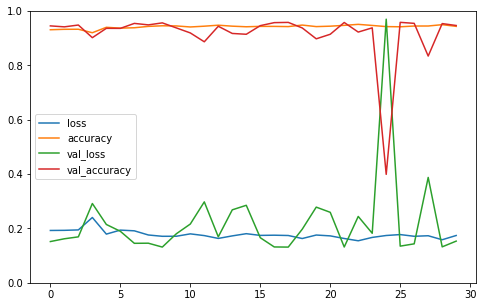

In [54]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid = True
plt.gca().set_ylim(0,1)
plt.show()

In [55]:
model.evaluate(X_test, y_test)

178/178 [==============================] - ETA: 0s - loss: 0.1463 - accuracy: 0.93 - ETA: 0s - loss: 0.1580 - accuracy: 0.93 - ETA: 0s - loss: 0.1475 - accuracy: 0.94 - ETA: 0s - loss: 0.1489 - accuracy: 0.94 - ETA: 0s - loss: 0.1487 - accuracy: 0.94 - 0s 1ms/step - loss: 0.1452 - accuracy: 0.9469


[0.14518775045871735, 0.9469042420387268]

# Real-world Test (r/shortscarystories and r/self)

In [56]:
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

In [57]:
text_creepy = """
This is so creepy. I feel so bad.
"""

text_non_creepy = """
Apples can grow from 10 to 30 feet tall and nearly as wide. They are moderately fast-growing, but growth slows with age. Apple trees can live for 100 years or more. 
Apple trees bloom in the spring, set fruit, and take from 100 to 200 days to reach harvest depending upon the variety.
"""

In [58]:
creepy_vec = np.concatenate(([np.log(1310+1+0.01)],sbert_model.encode(text_creepy)))
non_creepy_vec = np.concatenate(([np.log(1136+1+0.01)],sbert_model.encode(text_non_creepy)))
vecs = np.array([creepy_vec, non_creepy_vec])
vecs

array([[ 7.17855311, -0.00752401,  0.31660172, ..., -0.43979892,
         0.28065595,  0.92305613],
       [ 7.03615729,  0.06392798,  0.48229375, ...,  0.24400127,
        -0.76884204, -0.31326181]])

In [59]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_vecs = scaler.fit_transform(vecs)

In [60]:
scaled_vecs[::-1]

array([[0., 1., 1., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 1.]])

In [61]:
import sys
np.set_printoptions(threshold=100)
scaled_vecs

array([[1., 0., 0., ..., 0., 1., 1.],
       [0., 1., 1., ..., 1., 0., 0.]])

In [62]:
model.predict(scaled_vecs)

array([[0.0573799],
       [1.       ]], dtype=float32)

In [63]:
model

Failed

In [2]:
import spacy

In [4]:
nlp = spacy.load("en_core_web_sm")
doc = nlp(text_non_creepy)
for idx, sents in enumerate(doc.sents):
    pass
print(idx)

3
